<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [3]:
cd ..


/Users/pedram/MLE/code/MLE-10/assignments/week-08-unsupervised-ml


In [4]:
pwd

'/Users/pedram/MLE/code/MLE-10/assignments/week-08-unsupervised-ml'

In [6]:
# YOUR CODE HERE
import pandas as pd

past = pd.read_csv("./dat/past.csv.gz")

print(past.columns)

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')


<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [7]:
# YOUR CODE HERE
past.describe()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.573727e+06,5.235286e+08,1.951080,1.327052,2.490234e+05,7.457600,7.426321,0.541953,0.893687,0.413592,...,0.169931,0.213311,0.065900,0.162676,0.244012,0.169207,0.085550,0.343800,0.059343,1.143728
std,1.161840e+06,5.998702e+07,1.324727,0.718266,6.920382e+05,11.883206,11.876266,0.565350,0.841036,0.772170,...,0.255599,0.275556,0.172911,0.246050,0.289270,0.252342,0.191101,0.475023,0.153912,0.438141
min,4.104000e+03,6.524181e+07,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.760491e+06,4.998498e+08,1.000000,1.000000,0.000000e+00,2.483750,2.480000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.830816e+06,5.343735e+08,1.750000,1.166667,3.626375e+03,4.440585,4.440000,0.500000,1.000000,0.222222,...,0.000000,0.142857,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.875312e+06,5.616843e+08,2.308355,1.500000,2.071993e+05,7.620000,7.550000,0.858766,1.000000,0.632775,...,0.250000,0.333333,0.040000,0.250000,0.363636,0.250000,0.090909,1.000000,0.041888,1.045996
max,5.932538e+06,6.220262e+08,40.000000,28.000000,1.087537e+07,236.510000,236.510000,12.000000,28.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [282]:
past["Purchased?"].sum()/len(past["Purchased?"])*100

34.38


@
@
@

*** *** *** * ** ** *

34.38% of the interactions resulted in a purchase. 
Since only 1/3 of the customers who went to the store purchused something, we can assume that most of the people are window shopping.
-----------------Because the ratio of purchused:not purchused is around 1:2, we cannot conclude that the data is extremely imbalanced. We can say it is mildly imbalanced.

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [8]:
# YOUR CODE HERE
X = past.drop(["product_id","user_id"],axis=1)
y = X.pop("Purchased?")
# YOUR CODE HERE

In [9]:
X.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Nov,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category
0,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,0.000,1.000,...,0.00,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0.00,1.0
1,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,3.750,2.250,...,0.25,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0.00,1.0
2,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,17.250,30.000,...,0.25,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0.00,1.0
3,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,3.250,10.500,...,0.25,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0.25,1.0
4,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,4.875,3.375,...,0.25,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,0.00,1.0


In [89]:
#y = X["Purchased?"]

In [90]:
#X.drop(["Purchased?"],axis=1,inplace=True)

In [10]:
X.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Nov,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category
0,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,0.000,1.000,...,0.00,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0.00,1.0
1,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,3.750,2.250,...,0.25,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0.00,1.0
2,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,17.250,30.000,...,0.25,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0.00,1.0
3,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,3.250,10.500,...,0.25,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0.25,1.0
4,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,4.875,3.375,...,0.25,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,0.00,1.0


In [11]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

@@@

Since the range of the data for each feature is very different, we can perform a scaling on the features to improve the peformance of the models (ex:PCA)

In [12]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit(X)
#scaled = scaler.transform(X)
#X1=X
#scaler = MinMaxScaler()
#model = scaler.fit(X)
#X_s = model.transform(X)
#scaler = preprocessing.MinMaxScaler()
X[X.columns]=scaler.fit_transform(X)


In [17]:
#from sklearn.preprocessing import Normalizer

#norma = Normalizer().fit(X)
#norma.transform(X)
#X1.describe()
#scaled

In [14]:
X.describe()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Nov,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,...,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.421085e-18,5.115908e-17,-2.842171e-18,-2.913225e-17,-4.263256e-18,6.679102e-17,-9.166001e-17,6.750156e-17,-8.526513e-18,1.989520e-17,...,4.831691e-17,2.273737e-17,1.335820e-16,-7.815970e-18,-1.080025e-16,5.826450e-17,7.247536e-17,-3.446132e-17,2.700062e-17,2.330580e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,...,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-7.180158e-01,-4.553811e-01,-3.598765e-01,-6.276375e-01,-6.253703e-01,-9.587106e-01,-1.062708e+00,-5.356765e-01,-3.250804e-01,-2.867777e-01,...,-7.350787e-01,-6.649015e-01,-7.741880e-01,-3.811622e-01,-6.612164e-01,-8.436300e-01,-6.706130e-01,-4.477137e-01,-3.856059e-01,-2.610673e+00
25%,-7.180158e-01,-4.553811e-01,-3.598765e-01,-4.186032e-01,-4.165295e-01,-9.587106e-01,-4.681442e-01,-5.356765e-01,-2.884300e-01,-2.313342e-01,...,-7.350787e-01,-6.649015e-01,-7.741880e-01,-3.811622e-01,-6.612164e-01,-8.436300e-01,-6.706130e-01,-4.477137e-01,-3.856059e-01,-3.280737e-01
50%,-1.518049e-01,-2.233175e-01,-3.546359e-01,-2.539144e-01,-2.514780e-01,-7.421382e-02,1.264201e-01,-2.478583e-01,-1.967910e-01,-1.389284e-01,...,-4.271892e-01,-6.649015e-01,-2.557048e-01,-3.811622e-01,-6.612164e-01,-2.150250e-01,-6.706130e-01,-4.477137e-01,-3.856059e-01,-3.280737e-01
75%,2.697244e-01,2.408096e-01,-6.044212e-02,1.366768e-02,1.041504e-02,5.604413e-01,1.264201e-01,2.838824e-01,-2.192394e-02,2.760533e-03,...,4.415840e-01,3.132928e-01,4.356063e-01,-1.498056e-01,3.549393e-01,4.135801e-01,3.202043e-01,2.804700e-02,-1.134211e-01,-2.230840e-01
max,2.872495e+01,3.713892e+01,1.535668e+01,1.927723e+01,1.929113e+01,2.026921e+01,3.223289e+01,4.868124e+01,2.689896e+01,4.231231e+01,...,2.794909e+00,3.247876e+00,2.855195e+00,5.402751e+00,3.403406e+00,2.613698e+00,3.292656e+00,4.785654e+00,6.112266e+00,6.519724e+00


In [15]:
# YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA(n_components=5,whiten=True)
model = pca.fit(X)
X_reduced = model.transform(X)

In [16]:
assert X_reduced.shape == (5000, 5)

In [76]:
X_reduced

array([[ 0.31, -0.95,  0.74,  0.06,  0.61],
       [ 0.24,  0.01, -0.38,  0.18,  0.49],
       [-0.09, -0.65, -0.32, -0.31, -1.02],
       ...,
       [ 1.16, -1.34, -0.67, -0.39,  1.01],
       [ 1.34, -1.1 , -0.69,  0.32,  1.92],
       [-1.32,  0.2 ,  0.1 , -0.43,  0.21]])

5. Print out the percentage of variance explained by each of the selected components.

In [18]:
# YOUR CODE HERE
import numpy as np

np.set_printoptions(precision=2,suppress=True)
pca.explained_variance_ratio_

array([0.1 , 0.09, 0.06, 0.05, 0.04])

In [19]:
pca.explained_variance_ratio_.sum()

0.3557555571848295

In [20]:
pca.components_.shape

(5, 34)

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [21]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [22]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

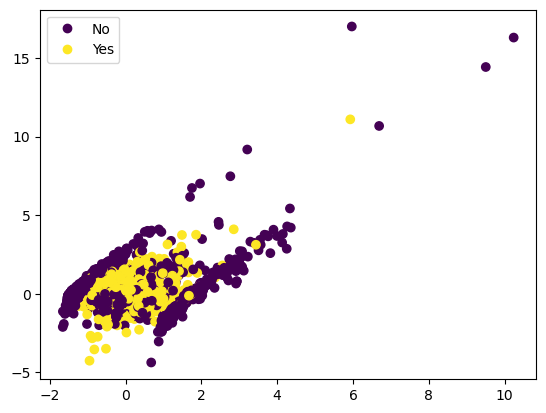

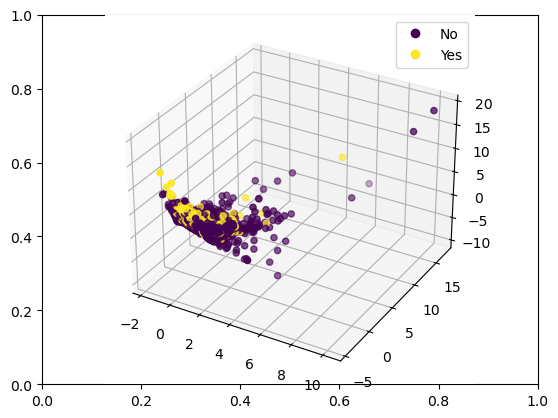

In [23]:
# YOUR CODE HERE
visualize_2pcs(X_reduced,y)
# YOUR CODE HERE
visualize_3pcs(X_reduced,y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [47]:
# YOUR CODE HERE (imports!)
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
scaler.fit(X)
scaled = scaler.transform(X)

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    if standardize == True:
        scaler = StandardScaler()
        X_train[X_train.columns]=scaler.fit_transform(X_train)
    clf = LogisticRegression().fit(X_train, y_train)
    uniq_count = dict(y_train.value_counts())
    print("We have ", uniq_count[0], " Zeros (not purchased) and ", uniq_count[1], " Ones (purchased).\n")
    y_pred = clf.predict(X_test)
    print("Classification report table:\n",classification_report(y_test, y_pred))

Now apply the pipeline on the all the features `X` and review the performance

In [48]:
# YOUR CODE HERE
train(X, y)

We have  2632  Zeros (not purchased) and  1368  Ones (purchased).

Classification report table:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77       649
           1       0.42      0.10      0.16       351

    accuracy                           0.64      1000
   macro avg       0.54      0.51      0.46      1000
weighted avg       0.57      0.64      0.55      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

@@@

We dont need to include the standardization this time since the X_reduced is already standardized!

In [51]:
# YOUR CODE HERE
train(pd.DataFrame(X_reduced), y,standardize=False)

We have  2632  Zeros (not purchased) and  1368  Ones (purchased).

Classification report table:
               precision    recall  f1-score   support

           0       0.64      0.96      0.77       649
           1       0.04      0.00      0.01       351

    accuracy                           0.63      1000
   macro avg       0.34      0.48      0.39      1000
weighted avg       0.43      0.63      0.50      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

@@@

We can expect that a reduced featured data set perform lower than a full set of features. In this example, PCA captures about 36% of the variation in the data. We can include more features to be able have a better performance from the model. 
Using a reduced set of features help the model to do its job faster and capture the variation in the data with only a small portion of the features (depending on the data set). At the same time, we are losing some variation explanation of the data. However, choosing the right number of features can depends on the data set and the desired metrics.

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

@@@



1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [53]:
# YOUR CODE HERE
from sklearn.cluster import KMeans



2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [60]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
        #kmeans.predict()
        # YOUR CODE HERE
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

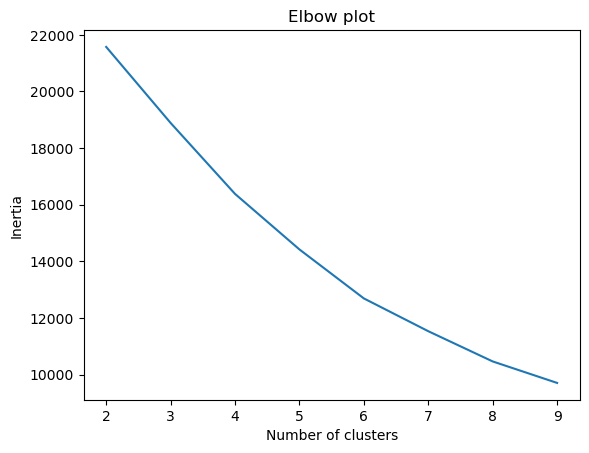

In [62]:
# YOUR CODE HERE






#check the inertias


visualize_elbow(X_reduced,range(2,10))

4. What are the disadvantage to use the Elbow method? 

    *YOUR ANSWER HERE*

@@@

By using elbow methos, we have a direction on what an optimal number of clusters are and very subjective. We do not have a finalized number of clusters and can be open to interpretation. Besides, when the data set changes, the k might also change. 

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [63]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.1953144625947333
For n_clusters = 3 The average silhouette_score is : 0.20802495858120856
For n_clusters = 4 The average silhouette_score is : 0.214084786668522
For n_clusters = 5 The average silhouette_score is : 0.20556543346915068
For n_clusters = 6 The average silhouette_score is : 0.21220058682699247
For n_clusters = 7 The average silhouette_score is : 0.21612393587210327
For n_clusters = 8 The average silhouette_score is : 0.21640290048928587


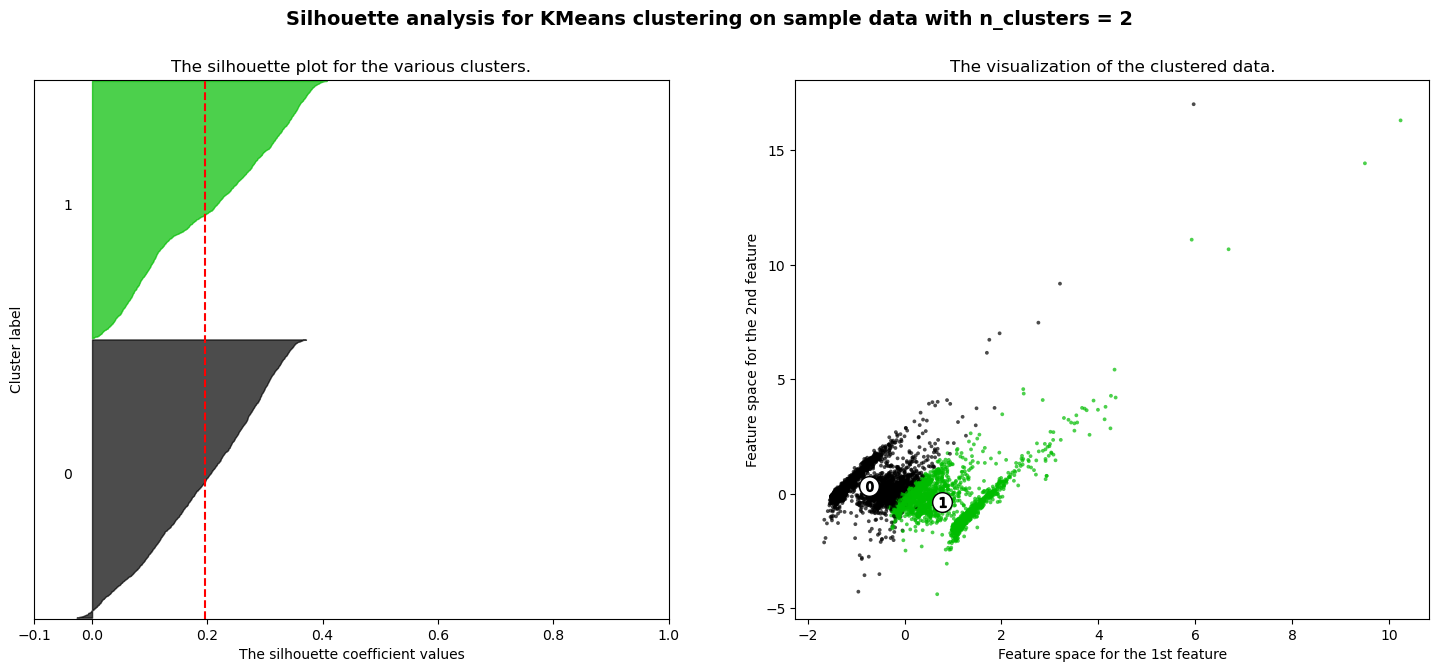

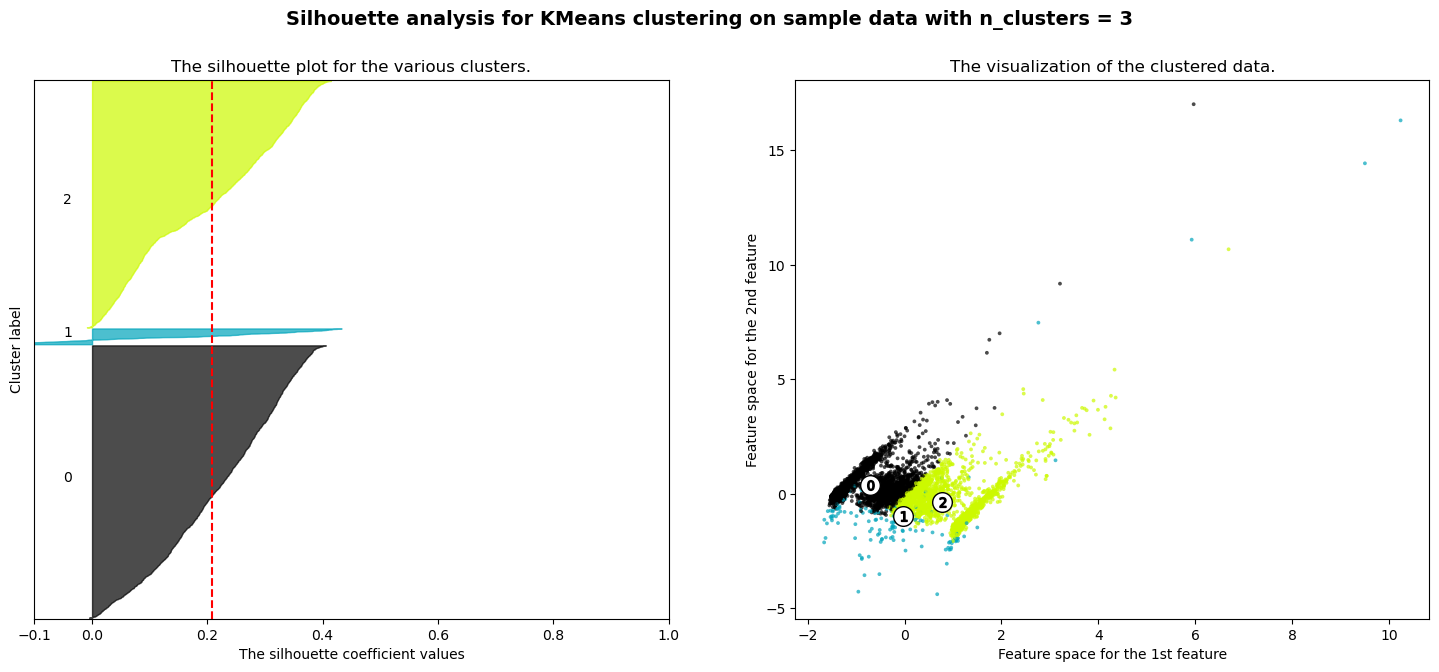

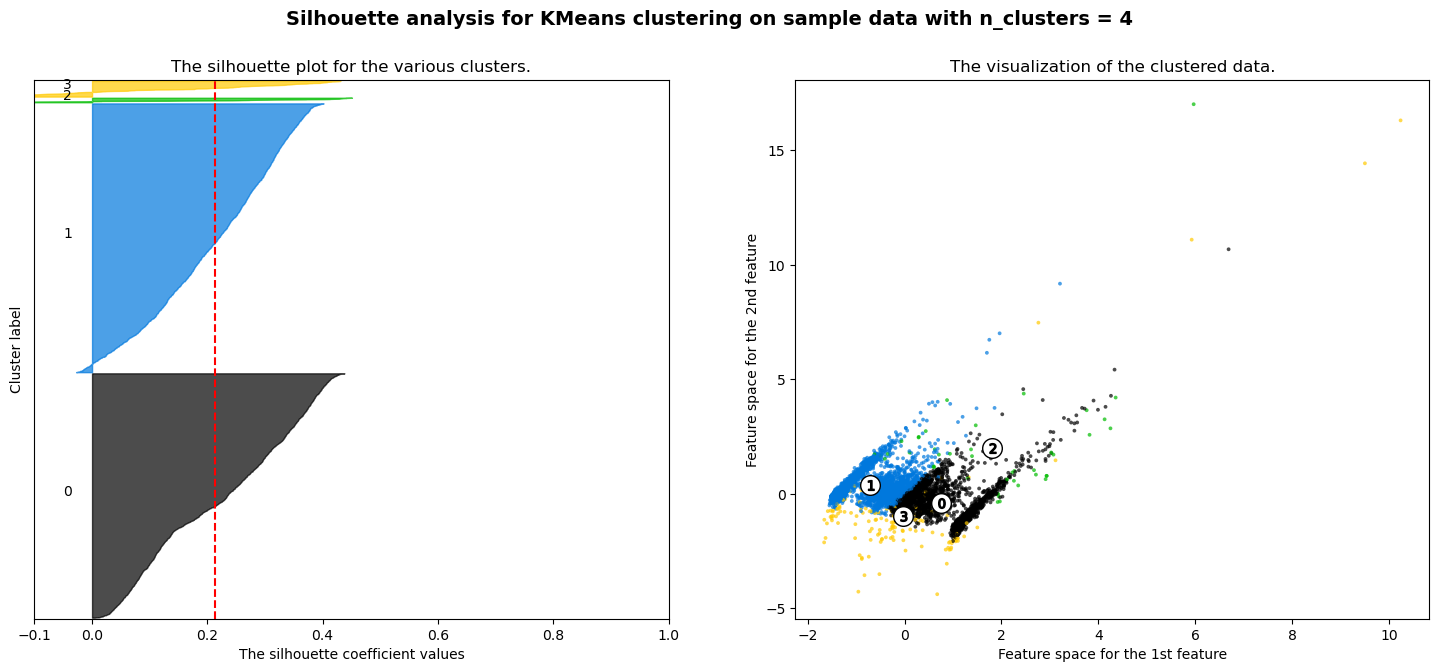

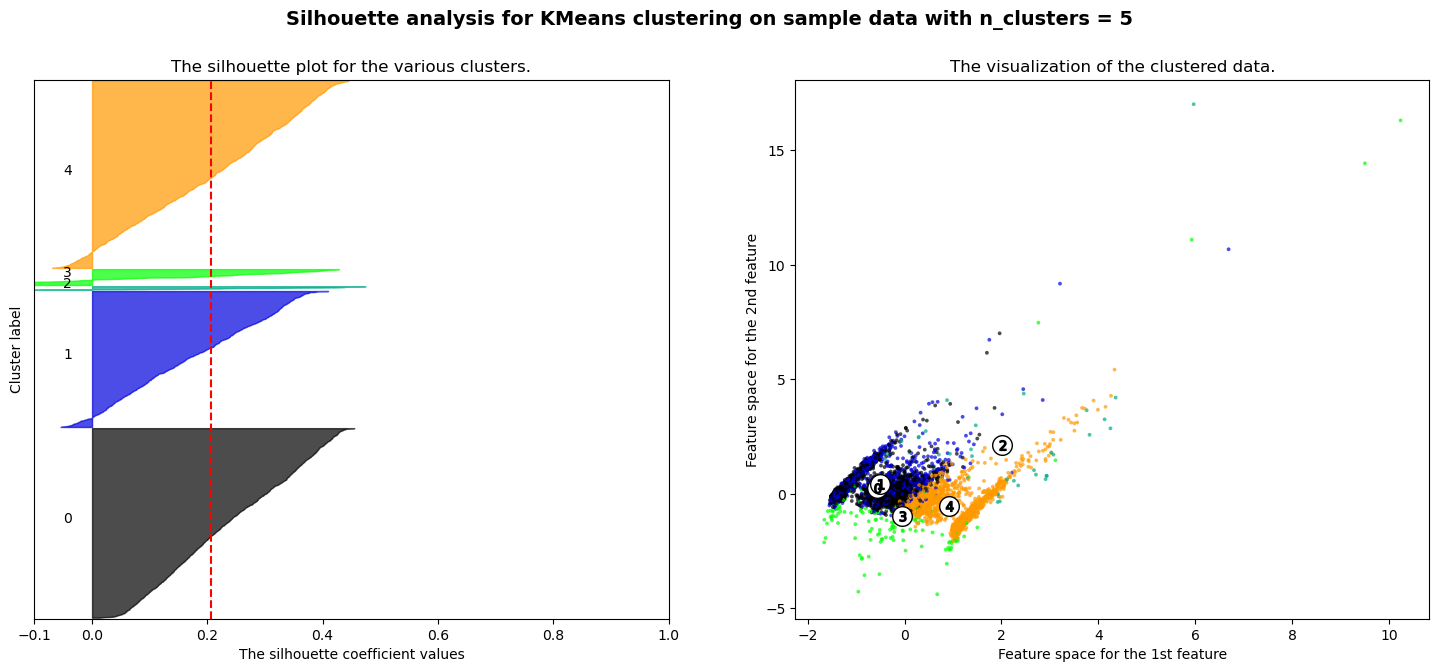

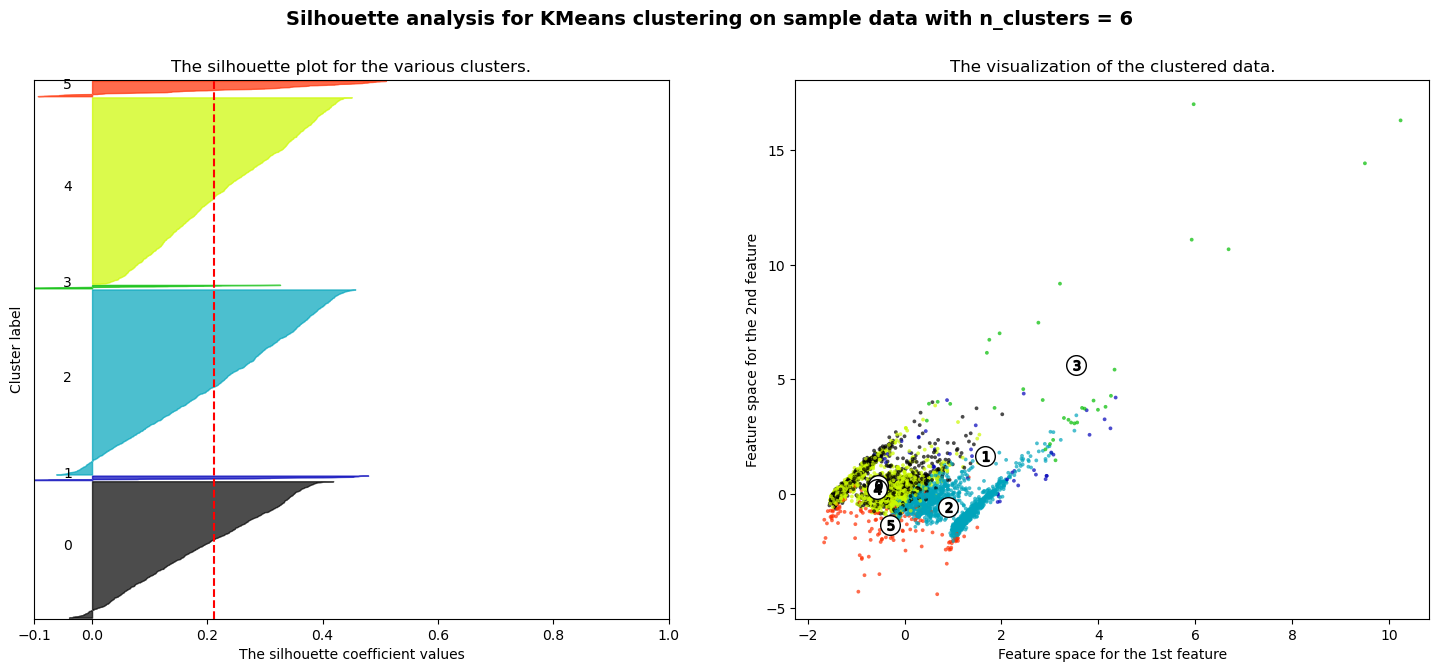

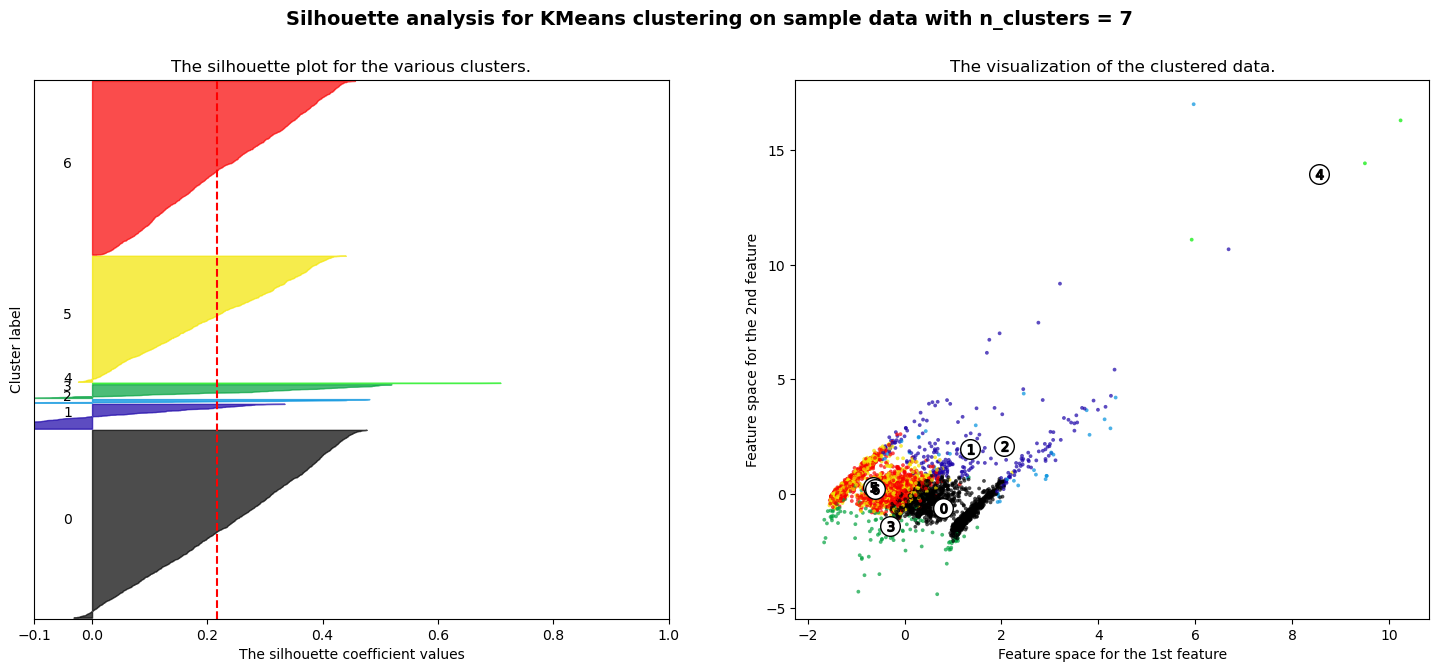

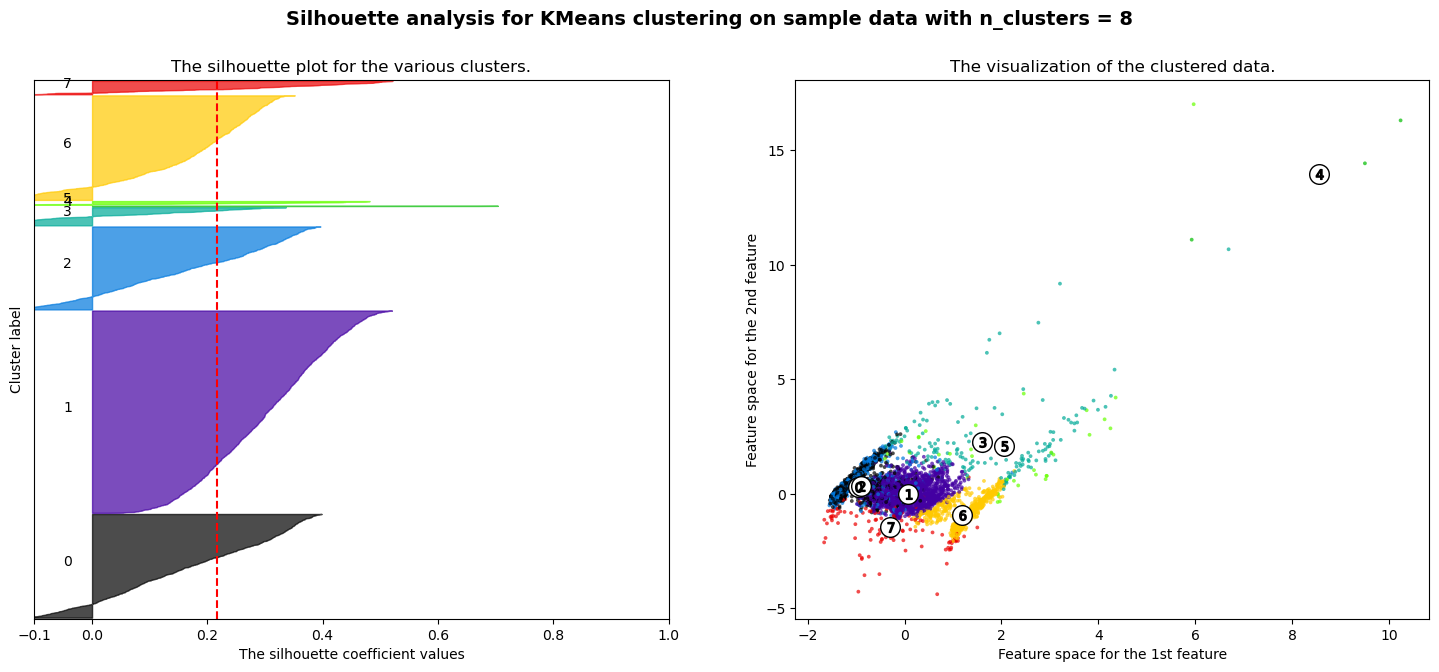

In [65]:
# YOUR CODE HERE
visualize_silhouette(8,X_reduced)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [69]:
# YOUR CODE HERE
km = KMeans(n_clusters=8, random_state=10).fit(X)

km.inertia_

125176.11197063755

7. What is the size of each cluster? 

In [70]:
# YOUR CODE HERE
pd.value_counts(km.labels_)

7    2153
5    1003
6     629
2     551
3     432
4     116
0      86
1      30
dtype: int64

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [71]:
# YOUR CODE HERE
past["cluster_pca"] = km.labels_

#why 38

In [187]:
past.head()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0,4
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0,1
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0,1
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0,1
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0,1


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*

In [150]:
# YOUR CODE HERE


In [147]:
testing = past.groupby('cluster_pca').describe()#.value_counts()
testing

product_id                                                     \
                 count          mean           std        min         25%   
cluster_pca                                                                 
0                 86.0  5.765724e+06  6.230782e+05    89190.0  5803201.25   
1                 30.0  5.853764e+06  6.750257e+04  5711723.0  5822261.00   
2                551.0  5.557482e+06  1.183214e+06     4104.0  5764684.50   
3                432.0  5.605916e+06  1.098334e+06     6372.0  5765435.50   
4                116.0  5.386876e+06  1.563897e+06     5379.0  5766130.25   
5               1003.0  5.732906e+06  7.984013e+05     4547.0  5803485.50   
6                629.0  5.620568e+06  1.043478e+06     5292.0  5764988.00   
7               2153.0  5.482082e+06  1.322898e+06     4185.0  5736285.00   

                                              user_id                ...  \
                   50%         75%        max   count          mean  ...   
cluster_pca                                                          ...   
0            5844732.0  5878664.50  5925353.0    86.0  5.012648e+08  ...   
1            5878891.5  5906357.00  5924088.0    30.0  4.927946e+08  ...   
2            5824769.0  5861578.50  5897788.0   551.0  5.110870e+08  ...   
3            5834606.5  5885919.50  5916644.0   432.0  5.210693e+08  ...   
4            5862001.0  5888095.25  5931773.0   116.0  5.392484e+08  ...   
5            5863473.0  5910605.50  5932538.0  1003.0  5.400422e+08  ...   
6            5828249.0  5868899.00  5908232.0   629.0  5.072615e+08  ...   
7            5816541.0  5859413.00  5915862.0  2153.0  5.247363e+08  ...   

                 Noon           Category                                      \
                  75%       max    count      mean       std  min  25%   50%   
cluster_pca                                                                    
0            0.000000  1.000000     86.0  2.455268  1.233331  0.0  1.5  2.75   
1            0.000000  0.333333     30.0  1.355556  0.769053  0.5  1.0  1.00   
2            0.000000  1.000000    551.0  1.051214  0.312464  0.5  1.0  1.00   
3            0.000000  1.000000    432.0  1.156865  0.560328  0.0  1.0  1.00   
4            0.071644  1.000000    116.0  1.059665  0.189881  0.6  1.0  1.00   
5            0.000000  1.000000   1003.0  1.048503  0.281010  0.0  1.0  1.00   
6            0.000000  1.000000    629.0  1.137443  0.496313  0.0  1.0  1.00   
7            0.090909  1.000000   2153.0  1.160156  0.320916  0.5  1.0  1.00   

                            
                  75%  max  
cluster_pca                 
0            3.500000  4.0  
1            1.375000  4.0  
2            1.000000  4.0  
3            1.000000  4.0  
4            1.079481  2.5  
5            1.000000  4.0  
6            1.000000  4.0  
7            1.250000  3.0  

[8 rows x 296 columns]

In [149]:
testing['Purchased?']

,count,mean,std,min,25%,50%,75%,max
cluster_pca,,,,,,,,
0,86.0,0.139535,0.348536,0.0,0.0,0.0,0.0,1.0
1,30.0,0.066667,0.253708,0.0,0.0,0.0,0.0,1.0
2,551.0,0.128857,0.335346,0.0,0.0,0.0,0.0,1.0
3,432.0,0.136574,0.343795,0.0,0.0,0.0,0.0,1.0
4,116.0,0.465517,0.500974,0.0,0.0,0.0,1.0,1.0
5,1003.0,0.129611,0.336043,0.0,0.0,0.0,0.0,1.0
6,629.0,0.154213,0.361440,0.0,0.0,0.0,0.0,1.0
7,2153.0,0.601022,0.489802,0.0,0.0,1.0,1.0,1.0


@@@

By looking at the statistical charcteristics of different features of each cluster, we can perform our analysis. For example, on the performance of each cluster compared to the target, we can see the clusters are not doing well chosen!

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*

@@@

-k-means assume the variance of the distribution of each attribute (variable) is spherical

-all variables have the same variance

-the prior probability for all k clusters are the same, i.e. each cluster has roughly equal number of observations 

When we look at the number of datapoints per clusters, we can see that they are not proportionally (almost 1:100 from the smallest to the biggest cluster size). This distribution might be an indication of a bad clsutering, and further analysis is needed to accept this assumption.


In [72]:
# YOUR CODE HERE
from sklearn.cluster import DBSCAN
from sklearn import metrics

clustering = DBSCAN(eps=0.5, min_samples=5).fit(X)
pd.value_counts(clustering.labels_)
metrics.silhouette_score(X, clustering.labels_)

-0.07204329875644917

In [73]:
clustering = DBSCAN(eps=1, min_samples=5).fit(X)
pd.value_counts(clustering.labels_)
metrics.silhouette_score(X, clustering.labels_)

-0.3315880088373841

In [74]:
clustering = DBSCAN(eps=3, min_samples=5).fit(X)
pd.value_counts(clustering.labels_)
metrics.silhouette_score(X, clustering.labels_)

0.058166352104249

In [75]:
clustering = DBSCAN(eps=5, min_samples=5).fit(X)
pd.value_counts(clustering.labels_)
metrics.silhouette_score(X, clustering.labels_)

0.431516641652253

In [78]:
pd.value_counts(clustering.labels_)

 0    4706
-1     294
dtype: int64

@@@

DBscan seems to cluster the dataset into a few large clusters and many small clusters and the points that do not belong to any clusters includes a big portion of the dataset. In the last examlple, althoigh DBScan get a relatively good number, but it clustered most of the data in one custer for the purchased=0 and the rest of the data points are not clustered.

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*
    
    @@@
    
    We can try different clutstering techniques and compare their silhouette_score to compare their performance. Since these two clustering methods do not seem tô perform well, trying different clustering techniques can be helpful. If the clustering techniques are very costly, we can perfom a clustering on a portion of the dataset to check the results before running a clustering model on the whole data set.   

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [206]:
pwd

'/Users/pedram/MLE/code/MLE-10/assignments/week-08-unsupervised-ml/nb'

In [80]:
# YOUR CODE HERE
new = pd.read_csv("./dat/new.csv.gz")

print(past.columns)

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category', 'cluster_pca'],
      dtype='object')


In [81]:
assert new.shape == (30091, 5)

In [82]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*

In [83]:
new.shape

(30091, 5)

In [84]:
past.shape

(5000, 38)

@@@

The past data set has 37 features and 5000 data points, however, the new data set has 5 features and 30k data points. The data points of the new data set is 6 times bigger that then past data set, however, we have more than 7 times the number of features in the past data set than the new data set. More features does not always equate to a better outcome; because some of the features can be redundant and we are able to get the same performance with only a portion of the features. 


*The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [85]:
nn,pp= new['product_id'], past['product_id']

In [86]:
xy, x_ind, y_ind = np.intersect1d(nn.to_numpy(),pp.to_numpy(), return_indices=True)

In [87]:
xy

array([], dtype=int64)

In [88]:
# YOUR CODE HERE
xy, x_ind, y_ind = np.intersect1d(new['product_id'], past['product_id'], return_indices=True)

In [89]:
print("xy: ",xy,"x_ind: ", x_ind, "y_ind",y_ind)

xy:  [] x_ind:  [] y_ind []


@@@

no intersection is observed!

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [90]:
# YOUR CODE HERE # ~.344
vals = pd.value_counts(new["Purchased?"])
vals[1]/vals.sum()

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [93]:
# YOUR CODE HERE

#should the train test be the past and new




from sklearn.model_selection import train_test_split

X_n = new.drop(["product_id"],axis=1)
y_n = X_n.pop("Purchased?")
#X.to_numpy()

X_train = X[X_n.columns]
X_test = X_n
y_train = y
y_test = y_n
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [127]:




#y_train = y_train.to_numpy()

In [96]:
type(X_train)

numpy.ndarray

In [128]:





#X_test = X_test.to_numpy()
#y_test = y_test.to_numpy()

In [98]:
X_test.shape

(30091, 3)

In [99]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [100]:
# YOUR CODE HERE
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
#uniq_count = dict(y_train.value_counts())
#print("We have ", uniq_count[0], " Zeros (not purchased) and ", uniq_count[1], " Ones (purchased).\n")
y_pred = clf.predict(X_test)
print("Classification report table:\n",classification_report(y_test, y_pred))

Classification report table:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76     19732
           1       0.48      0.27      0.34     10359

    accuracy                           0.65     30091
   macro avg       0.58      0.56      0.55     30091
weighted avg       0.62      0.65      0.62     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [101]:
# YOUR CODE HERE
#type(X_test)
X1 = np.concatenate((X_train,X_test),axis=0)

In [102]:
X1.shape

(35091, 3)

In [103]:
assert X1.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [104]:
# YOUR CODE HERE
y1 = np.concatenate((y_train,-np.ones(len(X_test))),axis=0)

In [114]:
assert X1.shape[0] == y1.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [115]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading

label_prop_model = LabelSpreading(kernel='knn',  alpha=0.01)
label_prop_model.fit(X1,y1)
#label_prop_model.fit(X_test,y_test)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [122]:
semi_sup_preds = label_prop_model.transduction_[len(X_train):]# YOUR CODE HERE

In [123]:
semi_sup_preds.shape

(30091,)

In [124]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [125]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.66      0.99      0.79     19732
           1       0.42      0.02      0.04     10359

    accuracy                           0.65     30091
   macro avg       0.54      0.50      0.41     30091
weighted avg       0.58      0.65      0.53     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76     19732
           1       0.48      0.27      0.34     10359

    accuracy                           0.65     30091
   macro avg       0.58      0.56      0.55     30091
weighted avg       0.62      0.65      0.62     30091



    *YOUR ANSWER HERE*
    
    @@@
    The semi supervised learning has better recall and f1 score for purchase=0 and rest are better for  the supervised model. When performing the Labelpreading, we can use different algorithms (ex,beside knn like a user defined function). Working with alpha might also help with the results since we only tried alpha=.01 
    

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

The ta

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)